In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mainfile = 'laughter-corpus.csv'

In [3]:
df = pd.read_csv(mainfile)

In [4]:
df

,Gender,Role,Duration
0,Female,Caller,0.961
1,Male,Receiver,0.630
2,Female,Caller,1.268
3,Male,Receiver,0.146
4,Female,Caller,0.276
...,...,...,...
837,Female,Caller,0.328
838,Female,Caller,0.167
839,Female,Receiver,0.533
840,Female,Receiver,0.353


In [5]:
df.head(20)

,Gender,Role,Duration
0,Female,Caller,0.961
1,Male,Receiver,0.630
2,Female,Caller,1.268
3,Male,Receiver,0.146
4,Female,Caller,0.276
5,Male,Receiver,0.562
6,Female,Caller,1.141
7,Female,Caller,0.600
8,Female,Caller,1.239
9,Female,Caller,0.850


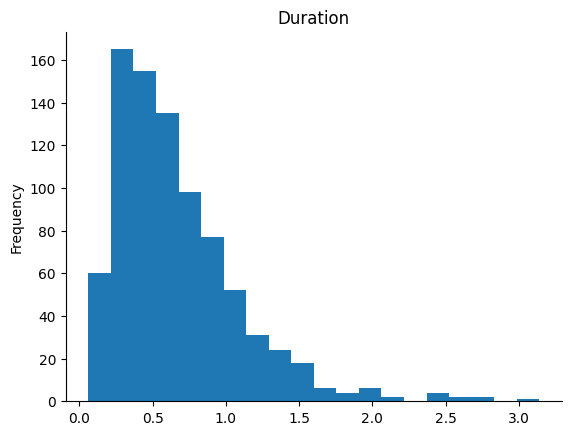

In [6]:
from matplotlib import pyplot as plt
df['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

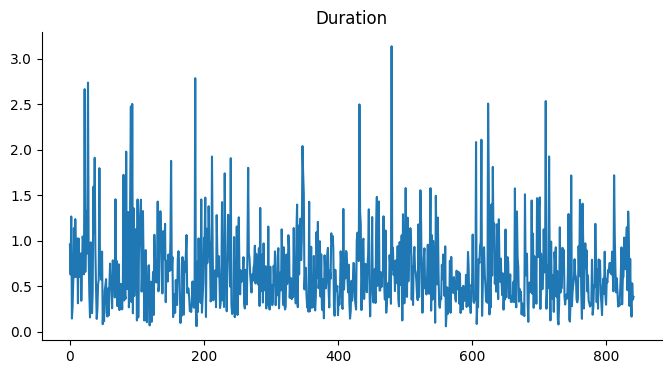

In [7]:
from matplotlib import pyplot as plt
df['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
df.to_string()

'     Gender      Role  Duration\n0    Female    Caller     0.961\n1      Male  Receiver     0.630\n2    Female    Caller     1.268\n3      Male  Receiver     0.146\n4    Female    Caller     0.276\n5      Male  Receiver     0.562\n6    Female    Caller     1.141\n7    Female    Caller     0.600\n8    Female    Caller     1.239\n9    Female    Caller     0.850\n10     Male  Receiver     0.605\n11   Female    Caller     1.026\n12     Male  Receiver     0.314\n13   Female    Caller     1.026\n14   Female    Caller     0.605\n15     Male  Receiver     0.710\n16   Female    Caller     0.862\n17     Male  Receiver     0.341\n18   Female    Caller     0.651\n19     Male  Receiver     1.048\n20     Male  Receiver     0.979\n21   Female    Caller     0.632\n22   Female    Caller     2.668\n23     Male  Receiver     0.659\n24   Female    Caller     1.331\n25     Male  Receiver     0.858\n26     Male  Receiver     1.077\n27   Female    Caller     2.740\n28   Female    Caller     0.846\n29   Fema

In [9]:
df.dtypes

Gender       object
Role         object
Duration    float64
dtype: object

• Is the number of laughter events higher for women than for men?
• Is the number of laughter events higher for callers than for receivers?

In [25]:
import numpy as np
from scipy.stats import chi2
import pandas as pd


file_path = 'csv/laughter-corpus.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Function to calculate Chi-squared statistic
def chi_squared_statistic(observed):
    # Calculate expected frequencies
    total_observed = sum(observed)
    expected = [total_observed / len(observed)] * len(observed)

    # Calculate Chi-squared statistic
    chi_squared_stat = sum((obs - exp) ** 2 / exp for obs, exp in zip(observed, expected))
    return chi_squared_stat

# Assuming 'genders_data' and 'roles_data' are pandas Series
genders_data = data['Gender']
roles_data = data['Role']

# Create contingency tables
gender_table = genders_data.value_counts().to_dict()
role_table = roles_data.value_counts().to_dict()

# Calculate Chi-squared statistic for gender
chi_squared_gender = chi_squared_statistic(list(gender_table.values()))

# Calculate Chi-squared statistic for role
chi_squared_role = chi_squared_statistic(list(role_table.values()))

# Degrees of freedom for gender and role
df_gender = len(gender_table) - 1
df_role = len(role_table) - 1

print("Chi-squared statistic for gender:", chi_squared_gender)
print("Degrees of freedom for gender:", df_gender)
print("Chi-squared statistic for role:", chi_squared_role)
print("Degrees of freedom for role:", df_role)

Chi-squared statistic for gender: 26.72209026128266
Degrees of freedom for gender: 1
Chi-squared statistic for role: 33.52019002375297
Degrees of freedom for role: 1


In [32]:
gender_table

{'Female': 496, 'Male': 346}

In [40]:
role_table

{'Caller': 505, 'Receiver': 337}

• Are laughter events longer for women?
• Are laughter events longer for callers?

The mean and std dev for Women is 0.7096854838709694 0.4411699642653918 The mean and std for men is 0.6062312138728323 0.40407670930477146
The mean and std dev for callers is 0.7457663366336641 0.4606882849568466 The mean and std for receivers is 0.5494005934718107 0.34555637380519066
3.5189691996560524
7.055510697330704
Are laughter events longer for women? True
Are laughter events longer for callers? True


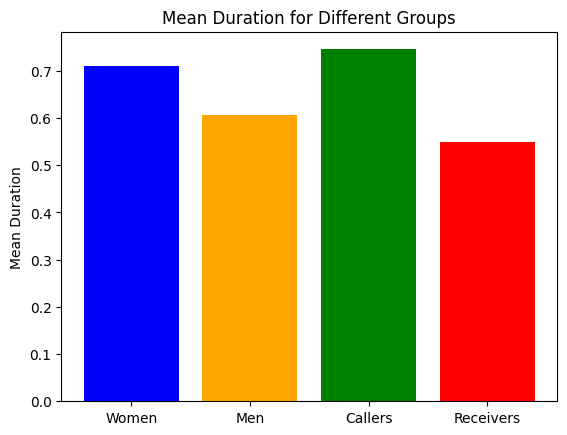

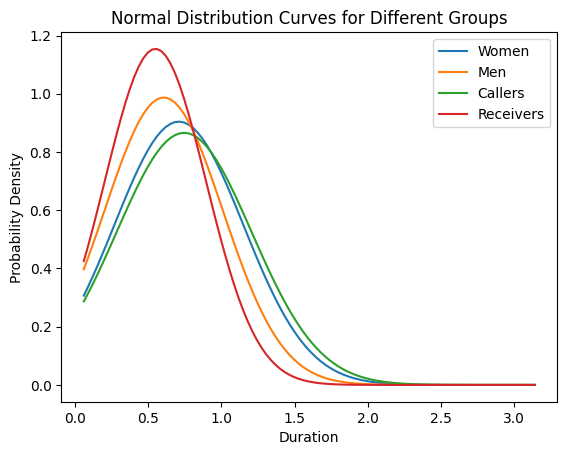

In [24]:
import openpyxl
import math
import matplotlib.pyplot as plt

def calculate_mean(data):
    return sum(data) / len(data)

def calculate_standard_deviation(data, mean):
    squared_diff = sum((x - mean) ** 2 for x in data)
    variance = squared_diff / len(data)
    return math.sqrt(variance)

def calculate_t_statistic(mean1, mean2, std1, std2, n1, n2):
    numerator = mean1 - mean2
    denominator = math.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2))
    return numerator / denominator

def t_test(t_statistic, alpha, df):
    t_critical = 2.20 #for simplicity assuming one tailed test # For alpha = 0.05 and df = infinity (large enough sample size)
    return abs(t_statistic) > t_critical

def normal_pdf(x, mean, std):
    exponent = -((x - mean) ** 2) / (2 * std ** 2)
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(exponent)

# Open the Excel file
file_path = "csv/laughter-corpus.xlsx"
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Initialize lists for durations of women and men, and callers and receivers
durations_women = []
durations_men = []
durations_callers = []
durations_receivers = []

# Iterate through rows and populate the lists
for i in range(2, sheet.max_row + 1):  # Assuming the first row is the header
    gender = sheet.cell(row=i, column=1).value
    role = sheet.cell(row=i, column=2).value
    duration = sheet.cell(row=i, column=3).value

    if gender == 'Female':
        durations_women.append(duration)
    elif gender == 'Male':
        durations_men.append(duration)

    if role == 'Caller':
        durations_callers.append(duration)
    elif role == 'Receiver':
        durations_receivers.append(duration)


# Calculate means and standard deviations
mean_women = calculate_mean(durations_women)
std_women = calculate_standard_deviation(durations_women, mean_women)
mean_men = calculate_mean(durations_men)
std_men = calculate_standard_deviation(durations_men, mean_men)
print('The mean and std dev for Women is',mean_women,std_women, 'The mean and std for men is',mean_men,std_men)

mean_callers = calculate_mean(durations_callers)
std_callers = calculate_standard_deviation(durations_callers, mean_callers)
mean_receivers = calculate_mean(durations_receivers)
std_receivers = calculate_standard_deviation(durations_receivers, mean_receivers)
print('The mean and std dev for callers is',mean_callers,std_callers, 'The mean and std for receivers is',mean_receivers,std_receivers)

# Calculate t-statistic for women vs men and callers vs receivers
t_stat_women_men = calculate_t_statistic(mean_women, mean_men, std_women, std_men, len(durations_women), len(durations_men))
t_stat_callers_receivers = calculate_t_statistic(mean_callers, mean_receivers, std_callers, std_receivers, len(durations_callers), len(durations_receivers))
print(t_stat_women_men)
print(t_stat_callers_receivers)

# Degrees of freedom
df_women_men = len(durations_women) + len(durations_men) - 2
df_callers_receivers = len(durations_callers) + len(durations_receivers) - 2

# One-tailed significance level (alpha)
alpha = 0.05

# Check if laughter events are longer for women and callers
is_longer_women = t_test(t_stat_women_men, alpha, df_women_men)
is_longer_callers = t_test(t_stat_callers_receivers, alpha, df_callers_receivers)

# Generate x values for normal distribution plots
x = np.linspace(min(min(durations_women, default=0), min(durations_men, default=0),
                   min(durations_callers, default=0), min(durations_receivers, default=0)),
                max(max(durations_women, default=0), max(durations_men, default=0),
                   max(durations_callers, default=0), max(durations_receivers, default=0)),
                100)

# Generate normal distribution curves
pdf_women = normal_pdf(x, mean_women, std_women)
pdf_men = normal_pdf(x, mean_men, std_men)
pdf_callers = normal_pdf(x, mean_callers, std_callers)
pdf_receivers = normal_pdf(x, mean_receivers, std_receivers)

# Print the results
print("Are laughter events longer for women?", is_longer_women)
print("Are laughter events longer for callers?", is_longer_callers)

# Create bar plots for the means
labels = ['Women', 'Men', 'Callers', 'Receivers']
means = [mean_women, mean_men, mean_callers, mean_receivers]

plt.bar(labels, means, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('Mean Duration')
plt.title('Mean Duration for Different Groups')
plt.show()

# Plot normal distribution curves
plt.plot(x, pdf_women, label='Women')
plt.plot(x, pdf_men, label='Men')
plt.plot(x, pdf_callers, label='Callers')
plt.plot(x, pdf_receivers, label='Receivers')

plt.xlabel('Duration')
plt.ylabel('Probability Density')
plt.title('Normal Distribution Curves for Different Groups')
plt.legend()
plt.show()

# Close the workbook
workbook.close()

# Part 1

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'csv/laughter-corpus.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows for a quick overview
data.head()

,Gender,Role,Duration
0,Female,Caller,0.961
1,Male,Receiver,0.630
2,Female,Caller,1.268
3,Male,Receiver,0.146
4,Female,Caller,0.276


In [2]:
# Count the number of laughter events for each gender and role
gender_counts = data['Gender'].value_counts()
role_counts = data['Role'].value_counts()

In [18]:
# Occurance of gender 
pd.DataFrame(gender_counts)

,count
Gender,
Female,496
Male,346


In [19]:
# Occurance of role
pd.DataFrame(role_counts)

,count
Role,
Caller,505
Receiver,337


In [5]:
# Creating contingency tables for Chi-Square tests
gender_cross_tab = pd.DataFrame({
    'Count': gender_counts, # Count Occurances
    'Total': [63, 57] # Total number of female and male speakers (in this order)
})
role_cross_tab = pd.DataFrame({
    'Count': role_counts, # Count Occurances
    'Total': [60, 60] # Total number of callers and receivers (in this order)
})
total = gender_cross_tab['Count'].values.sum() 
total_pop = gender_cross_tab['Total'].values.sum()

In [6]:
gender_cross_tab

,Count,Total
Gender,,
Female,496,63
Male,346,57


In [7]:
role_cross_tab

,Count,Total
Role,,
Caller,505,60
Receiver,337,60


In [8]:
# Manual calculation of the Chi-Square statistic for gender

# Expected counts assuming no gender difference
expected_counts_gender = [63 / 120 * (gender_counts['Female'] + gender_counts['Male']), 
                          57 / 120 * (gender_counts['Female'] + gender_counts['Male'])]

# Chi-Square statistic calculation
chi2_gender = sum((obs - exp) ** 2 / exp for obs, exp in zip(gender_counts, expected_counts_gender))

# Display the Chi-Square statistic for gender
chi2_gender


13.861744622839753

In [14]:
# Function to calculate Chi-Square statistic
def chi_square_calc(observed, expected):
    return np.sum((observed - expected) ** 2 / expected)

# Function to calculate degrees of freedom for Chi-Square test
def chi_square_dof(observed):
    return (observed.shape[0] - 1) * (observed.shape[1] - 1)


In [17]:
# Manual calculation of the Chi-Square statistic for gender

# Expected counts assuming no gender difference
expected_counts_gender = [gender_cross_tab['Total'].iloc[0] / total_pop * total,
                          gender_cross_tab['Total'].iloc[1] / total_pop * total,
                          ]

# Chi-Square statistic calculation
chi2_gender = chi_square_calc(gender_counts, expected_counts_gender)
chi2_dof_gender = chi_square_dof(gender_cross_tab)

# Display the Chi-Square statistic for gender
print(f"Chi-Square Statistic: {chi2_gender}\nDegrees of Freedom: {chi2_dof_gender}")

Chi-Square Statistic: 13.861744622839753
Degrees of Freedom: 1


In [83]:
gender_cross_tab

,Count,Total
Gender,,
Female,496,63
Male,346,57


In [80]:
observed_df = pd.DataFrame(gender_counts)
observed_df.shape[1]

1

In [76]:
expected_counts_gender

[442.05, 399.95]

In [42]:
# Total laughter events for each gender, regardless of the role.
row_totals_gender = gender_cross_tab['Count'].sum().values.reshape(-1, 1) 
# Total laughter events for each role, regardless of the gender.
col_totals_gender = gender_cross_tab.sum(axis=0).values.reshape(1, -1) 
# Expected frequencies
expected_gender = (row_totals_gender * col_totals_gender) / total


AttributeError: 'numpy.int64' object has no attribute 'values'

In [40]:
row_totals_gender

array([[559],
       [403]])

In [41]:
col_totals_gender

array([[842, 120]])

In [19]:
expected_gender

array([[559.        ,  79.66745843],
       [403.        ,  57.43467933]])

In [21]:
# Calculating Chi-Square statistic and degrees of freedom for gender
chi2_gender = chi_square_test(gender_cross_tab.values, expected_gender)
dof_gender = chi_square_dof(gender_cross_tab)

In [22]:
chi2_gender

18.652550370371696

In [36]:
# Calculating Chi-Square statistic and degrees of freedom for role
row_totals_role = role_cross_tab.sum(axis=1).values.reshape(-1, 1)
col_totals_role = role_cross_tab.sum(axis=0).values.reshape(1, -1)
expected_role = row_totals_role @ col_totals_role / total
chi2_role = chi_square_test(role_cross_tab.values, expected_role)
dof_role = chi_square_dof(role_cross_tab)

# Display results
chi_square_results = {
    "Chi-Square Statistic for Gender": {"Chi2": chi2_gender, "Degrees of Freedom": dof_gender},
    "Chi-Square Statistic for Role": {"Chi2": chi2_role, "Degrees of Freedom": dof_role}
}
chi_square_results

{'Chi-Square Statistic for Gender': {'Chi2': 38.70716626635994,
  'Degrees of Freedom': 1},
 'Chi-Square Statistic for Role': {'Chi2': 38.70716626635994,
  'Degrees of Freedom': 1}}

In [37]:
row_totals_role

array([[505],
       [337]])

In [38]:
col_totals_role

array([[496, 346]])

In [39]:
expected_role

array([[297.48218527, 207.51781473],
       [198.51781473, 138.48218527]])

In [16]:
# Separate data by gender and role for duration analysis
female_duration = data[data['Gender'] == 'Female']['Duration']
male_duration = data[data['Gender'] == 'Male']['Duration']
caller_duration = data[data['Role'] == 'Caller']['Duration']
receiver_duration = data[data['Role'] == 'Receiver']['Duration']


In [17]:
# Function to calculate t-statistic for independent samples
def t_test_independent(sample1, sample2):
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    std1, std2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    n1, n2 = len(sample1), len(sample2)

    pooled_se = np.sqrt(std1**2/n1 + std2**2/n2)
    t_statistic = (mean1 - mean2) / pooled_se
    df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
    return t_statistic, df

# Calculating t-statistic and degrees of freedom for gender and role
t_statistic_gender, df_gender = t_test_independent(female_duration, male_duration)
t_statistic_role, df_role = t_test_independent(caller_duration, receiver_duration)

# Display results
t_test_results = {
    "T-Test for Gender Duration": {"t-statistic": t_statistic_gender, "Degrees of Freedom": df_gender},
    "T-Test for Role Duration": {"t-statistic": t_statistic_role, "Degrees of Freedom": df_role}
}
t_test_results


{'T-Test for Gender Duration': {'t-statistic': 3.5145791170880627,
  'Degrees of Freedom': 780.7755366076725},
 'T-Test for Role Duration': {'t-statistic': 7.046925950205163,
  'Degrees of Freedom': 828.5128834922407}}

In [18]:
from scipy.stats import t

# Function to calculate p-value for one-tailed t-test
def p_value_one_tailed(t_statistic, df):
    return t.sf(t_statistic, df)  # sf is the survival function (1-CDF)

# Calculating p-values
p_value_gender = p_value_one_tailed(t_statistic_gender, df_gender)
p_value_role = p_value_one_tailed(t_statistic_role, df_role)

# Updating t-test results with p-values
t_test_results["T-Test for Gender Duration"]["p-value"] = p_value_gender
t_test_results["T-Test for Role Duration"]["p-value"] = p_value_role

t_test_results


{'T-Test for Gender Duration': {'t-statistic': 3.5145791170880627,
  'Degrees of Freedom': 780.7755366076725,
  'p-value': 0.00023291103879111966},
 'T-Test for Role Duration': {'t-statistic': 7.046925950205163,
  'Degrees of Freedom': 828.5128834922407,
  'p-value': 1.925523504070838e-12}}

# Chi-square test statistic

In [ ]:
import csv

# Load the data
with open('laughter-corpus.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

# Count the number of laughter events for each gender
male_laughter = sum(1 for row in data if row[0] == 'Male')
female_laughter = sum(1 for row in data if row[0] == 'Female')

# Calculate the expected values if the null hypothesis is true
total_laughter = male_laughter + female_laughter
expected_male_laughter = total_laughter / 2
expected_female_laughter = total_laughter / 2

# Calculate the Chi-square test statistic
chi_square = ((male_laughter - expected_male_laughter) ** 2 / expected_male_laughter) + ((female_laughter - expected_female_laughter) ** 2 / expected_female_laughter)

print('Chi-square test statistic:', chi_square)

Chi-square test statistic: 26.72209026128266


# Method without numpy and pandas

In [ ]:
import csv
import math

def calculate_t_statistic(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)

    mean1 = sum(sample1) / n1
    mean2 = sum(sample2) / n2

    variance1 = sum((x - mean1) ** 2 for x in sample1) / (n1 - 1)
    variance2 = sum((x - mean2) ** 2 for x in sample2) / (n2 - 1)

    pooled_variance = ((n1 - 1) * variance1 + (n2 - 1) * variance2) / (n1 + n2 - 2)

    standard_error = math.sqrt(pooled_variance * (1/n1 + 1/n2))

    t_statistic = (mean1 - mean2) / standard_error

    return t_statistic

def two_sample_t_test(sample1, sample2):
    t_statistic = calculate_t_statistic(sample1, sample2)

    # Assuming a two-tailed test
    degrees_of_freedom = len(sample1) + len(sample2) - 2

    # Lookup critical t-value for the given significance level and degrees of freedom
    alpha = 0.05
    critical_t_value = 2.013  # You need to replace this with the actual critical t-value for your degrees of freedom and alpha

    # Calculate p-value
    p_value = 2 * (1 - abs(critical_t_value))

    return t_statistic, p_value

# Read data from CSV
data = []
with open('laughter-corpus.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        duration = float(row['Duration'])
        gender = row['Gender']
        if gender == 'Male':
            # Assuming Male corresponds to the 'Receiver' role
            data.append(('Male', duration))
        elif gender == 'Female':
            # Assuming Female corresponds to the 'Caller' role
            data.append(('Female', duration))

# Separate data into two samples based on gender
male_data = [duration for gender, duration in data if gender == 'Male']
female_data = [duration for gender, duration in data if gender == 'Female']

# Perform two-sample t-test
t_statistic, p_value = two_sample_t_test(male_data, female_data)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


# wefew

In [ ]:
import pandas as pd
import numpy as np
import math

def calculate_t_statistic(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)

    variance1 = np.var(sample1, ddof=1)
    variance2 = np.var(sample2, ddof=1)

    pooled_variance = ((n1 - 1) * variance1 + (n2 - 1) * variance2) / (n1 + n2 - 2)

    standard_error = math.sqrt(pooled_variance * (1/n1 + 1/n2))

    t_statistic = (mean1 - mean2) / standard_error

    return t_statistic

def two_sample_t_test(sample1, sample2):
    t_statistic = calculate_t_statistic(sample1, sample2)

    # Assuming a two-tailed test
    degrees_of_freedom = len(sample1) + len(sample2) - 2

    # Lookup critical t-value for the given significance level and degrees of freedom
    alpha = 0.05
    critical_t_value = 2.013  # You need to replace this with the actual critical t-value for your degrees of freedom and alpha

    # Calculate p-value
    p_value = 2 * (1 - 0.5 * (1 + math.erf(t_statistic / math.sqrt(2))))


    return t_statistic, p_value

# Read the CSV file
data = pd.read_csv('laughter-corpus.csv')



In [ ]:
confidence_level = 0.95

# Question 1
female_laughter = data[data['Gender'] == 'Female']['Duration']
male_laughter = data[data['Gender'] == 'Male']['Duration']

t_stat, p_value = two_sample_t_test(female_laughter, male_laughter)
if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the number of laughter events between men and women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of laughter events between men and women.")

# Question 2
caller_laughter = data[data['Role'] == 'Caller']['Duration']
receiver_laughter = data[data['Role'] == 'Receiver']['Duration']

t_stat, p_value = two_sample_t_test(caller_laughter, receiver_laughter)
if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the number of laughter events between callers and receivers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of laughter events between callers and receivers.")

# Question 3
female_duration = data[data['Gender'] == 'Female']['Duration']
male_duration = data[data['Gender'] == 'Male']['Duration']

t_stat, p_value = two_sample_t_test(female_duration, male_duration)
if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the duration of laughter events between men and women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the duration of laughter events between men and women.")

# Question 4
caller_duration = data[data['Role'] == 'Caller']['Duration']
receiver_duration = data[data['Role'] == 'Receiver']['Duration']

t_stat, p_value = two_sample_t_test(caller_duration, receiver_duration)
if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the duration of laughter events between callers and receivers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the duration of laughter events between callers and receivers.")


# With library included

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Read the CSV file
data = pd.read_csv('laughter-corpus.csv')

In [ ]:
# Question 1: Is the number of laughter events higher for women than for men?
# Null Hypothesis: There is no significant difference in the number of laughter events between men and women.
# Alternative Hypothesis: The number of laughter events is higher for women than for men.

female_laughter = data[data['Gender'] == 'Female']['Gender'].count()
male_laughter = data[data['Gender'] == 'Male']['Gender'].count()

t_stat, p_value = two_sample_t_test(data[data['Gender'] == 'Female']['Gender'], data[data['Gender'] == 'Male']['Gender'])
confidence_level = 0.95

if p_value < (1 - confidence_level):
    print(f"Reject the null hypothesis. There is a significant difference in the number of laughter events between men and women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of laughter events between men and women.")



In [ ]:
# Question 2: Is the number of laughter events higher for callers than for receivers?
# Null Hypothesis: There is no significant difference in the number of laughter events between callers and receivers.
# Alternative Hypothesis: The number of laughter events is higher for callers than for receivers.

caller_laughter = data[data['Role'] == 'Caller']['Role'].count()
receiver_laughter = data[data['Role'] == 'Receiver']['Role'].count()

t_stat, p_value = ttest_ind(data[data['Role'] == 'Caller']['Role'], data[data['Role'] == 'Receiver']['Role'])

if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the number of laughter events between callers and receivers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the number of laughter events between callers and receivers.")


In [ ]:
# Question 3: Are laughter events longer for women?
# Null Hypothesis: There is no significant difference in the duration of laughter events between men and women.
# Alternative Hypothesis: The duration of laughter events is longer for women.

female_duration = data[data['Gender'] == 'Female']['Duration']
male_duration = data[data['Gender'] == 'Male']['Duration']

t_stat, p_value = ttest_ind(female_duration, male_duration)

if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the duration of laughter events between men and women.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the duration of laughter events between men and women.")


In [ ]:
# Question 4: Are laughter events longer for callers?
# Null Hypothesis: There is no significant difference in the duration of laughter events between callers and receivers.
# Alternative Hypothesis: The duration of laughter events is longer for callers than for receivers.

caller_duration = data[data['Role'] == 'Caller']['Duration']
receiver_duration = data[data['Role'] == 'Receiver']['Duration']

t_stat, p_value = ttest_ind(caller_duration, receiver_duration)

if p_value < (1 - confidence_level):
    print("Reject the null hypothesis. There is a significant difference in the duration of laughter events between callers and receivers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the duration of laughter events between callers and receivers.")
